## Query BCO-DMO ERDDAP and plot
ERDDAP rich responses and RESTful API is makes it a convenient way to serve and access data.

This notebook was built using the example [IOOS erddapy notebook](https://github.com/ioos/notebooks_demos/blob/master/notebooks/2018-03-01-erddapy.ipynb).

Author: Mathew Biddle (mbiddle@whoi.edu)

### First off, we need to import some libraries to make this all work:

In [1]:
from erddapy import ERDDAP
from IPython.display import display,clear_output
import pandas as pd
import numpy as np
import ipywidgets
import sys
import requests
%matplotlib inline

### Now we start building the ERDDAP query
Using erddapy, a user can build URLs programmatically.
  
Here we simply build the ERDDAP query for the entire BCO-DMO ERDDAP.

In [2]:
server='http://erddap.bco-dmo.org/erddap'
e = ERDDAP(
    server=server,
    protocol='tabledap'
    ) 

### Use BCO-DMO ERDDAP to start narrowing down the search
This section builds out a Category dropdown, which the user selects. 
* Another table is dynamically build based on the requested Category. 
* The user can select multiple terms (using ctl+click or SHIFT+click) from the specifiec Category, as needed.

In [3]:
# collect all the possible categories and build a section widget
url = '%s/categorize/index.csv'%server
df = pd.read_csv(url)

categ = df['Categorize'].values

# build the widget
resp = ipywidgets.Dropdown(options=categ,description='Category:',rows=10,columns=2)
display(resp)

def on_value_change(change):
    global term
    global resp
    global cat
    cat=change['new']
    #global change
    url_var='%s/categorize/%s/index.csv'%(server,change['new'])
    df_var=pd.read_csv(url_var)
    term=df_var['Category'].values
    term = ipywidgets.SelectMultiple(options=term,description='%s:'%(change['new']),rows=20,columns=50,layout=ipywidgets.Layout(width='100%', height='200px'))
    clear_output(wait=True)
    display(resp,term)
    print(url_var)

resp.observe(on_value_change, names='value')


Dropdown(description='Category:', options=('keywords', 'long_name', 'standard_name', 'variableName'), value='keywords')

SelectMultiple(description='keywords:', layout=Layout(height='200px', width='100%'), options=('0d8um', '0pt2um', '10um', '1100uatm', '1419tri', '14528tet', '15um', '18144tri', '1e06', '1w7', '1w9c', '1w9t', '20um', '21378tri', '23415tet', '23889tri', '25362tri', '25632tet', '25745tet', '25mm', '29109tet', '2ml', '2ms', '2um', '3ml', '4w6', '50l', '5w3', '5w6', '6231tet', '6266tri', '6326tet', '6w3', '6w6', '750uatm', '8um', '95pcnt', '985tet', 'a11', 'a13', 'a15', 'a17', 'a19', 'a254', 'a254_doc', 'a3_s_fitti', 'a635', 'a665', 'a668', 'a_to_c_peak', 'a_to_m_peak', 'a_to_t_peak', 'aa_phosphate', 'aa_silicate', 'abs', 'absence', 'absolute', 'absolute_concentration_eggs', 'absolute_concentration_spawning_adult', 'absorption', 'abun', 'abund', 'abund_integ', 'abund_m2', 'abund_m3', 'abundance', 'abundance_species', 'abundance_total', 'acanthaster', 'acanthaster_id', 'acanthaster_origin', 'acanthias', 'accelation', 'acceleration', 'acceleration_t0', 'acceleration_t10ms', 'acceleration_t16ms', 'acceleration_t1point5ms', 'acceleration_t20ms', 'acceleration_t2ms', 'acceleration_t4ms', 'acceleration_t6ms', 'acceleration_t8ms', 'accession', 'accession_16s', 'accession_coi', 'accession_h3', 'accession_link', 'accession_number', 'accession_numbers', 'acclimatisation', 'accompanying', 'accompanying_ancillary_data', 'accuracy', 'acetate', 'acid', 'acropora', 'acropora2', 'acropora_colonies', 'acropora_interspecific_interactions', 'acropora_pocillopora_interactions', 'acroporathicket', 'acroporathicket2', 'act', 'action', 'active', 'activity', 'actual', 'actual_depth', 'added', 'added_mass', 'addition', 'address', 'adenosine_5prime_triphosphate', 'adj', 'adj_count', 'adj_growth', 'adult', 'adult_collection_site', 'adults', 'aeglefinus', 'aeps', 'aerodynamic', 'aerosol', 'afdm', 'afdm_wm_ratio', 'afl', 'after', 'ag110m', 'ag110m_conc_dry', 'ag_lpt_conc_pump', 'ag_lpt_conc_pump_qv_odv', 'ag_lpt_conc_pump_stdev', 'ag_spt_conc_pump', 'ag_spt_conc_pump_qv_odv', 'ag_spt_conc_pump_stdev', 'agaricia', 'agarum', 'agarum_clathratum_density', 'age', 'agg', 'agg_num_per_tank', 'agg_size', 'agg_species', 'aggregate', 'aggregate_byrozoan', 'air', 'air2', 'air_press', 'air_pressure', 'air_temp', 'air_vol_total', 'airbrush', 'akashiwo', 'al_flag', 'al_hac_l_avg_aerosol', 'al_hac_l_qf_aerosol', 'al_hac_l_var_aerosol', 'al_lpt_conc_pump', 'al_lpt_conc_pump_qv_odv', 'al_lpt_conc_pump_stdev', 'al_spt_conc_pump', 'al_spt_conc_pump_qv_odv', 'al_spt_conc_pump_stdev', 'al_tp_conc_avg_aerosol', 'al_tp_conc_bottle', 'al_tp_conc_bottle_stdev', 'al_tp_conc_qf_aerosol', 'al_tp_conc_var_aerosol', 'ala', 'ala_d15n', 'ala_st_dev', 'ala_stdev', 'alanine', 'albidus', 'alex', 'alex_live', 'alexandrium', 'alexandrium_sp', 'algae', 'algae_initial', 'algae_pcntcoverchange', 'algal', 'algal_area_c', 'algal_area_o2', 'aliquot', 'alive', 'alk', 'alk_stdev', 'alkalinity', 'alkalinity_mm', 'alkalinity_mol_kg', 'alkalinity_umol_kg', 'all', 'all_crowded', 'all_difference', 'all_isolated', 'all_mean', 'all_mycetophylla', 'all_se', 'allelic', 'allelic_richness', 'allo', 'allo_corr', 'allox', 'allsort', 'allsort_flag', 'along', 'alpha', 'alpha_carotene', 'alt_cruise_id', 'alteromonas', 'altim', 'altimetry', 'altitude', 'altitude_units', 'altm', 'americanus', 'aminoethylphosphonic', 'ammonia', 'ammonium', 'ammonium_oo_diethyldithiophosphate', 'ammonium_polyphosphate', 'ammonium_sd', 'ammonium_sulfate', 'amo', 'amount', 'amount_grams_consumed', 'amount_mg_consumed', 'amount_mg_consumed_cm2_day_t10', 'amount_mg_consumed_cm2_day_t15', 'amount_mg_consumed_cm2_day_t20', 'amount_mg_consumed_cm2_day_t5', 'amount_mg_consumed_d_gram_urchin', 'amount_mg_consumed_day', 'amount_mg_consumed_day_t10', 'amount_mg_consumed_day_t15', 'amount_mg_consumed_day_t20', 'amount_mg_consumed_day_t5', 'amount_mg_consumed_t10', 'amount_mg_consumed_t15', 'amount_mg_consumed_t20', 'amount_mg_consumed_t5', 'amphipod', 'amu', 'analysis', 'analysis_lab', 'analysis_methods', 'analysis_name', 'anammox', 'ancillary', 'anemon

http://erddap.bco-dmo.org/erddap/categorize/keywords/index.csv


## Search BCO-DMO ERDDAP and find the datasets that have the requested parameters
Here we query the BCO-DMO ERDDAP for all datasets that have the selected terms from above. 
* If multiple terms are selected, only return the datasets which have all selected terms.
* Send error if no datasets were found. User should try another search above.

In [4]:
# Get selected and build query.
params = term.get_interact_value()
d_id = pd.read_csv('https://erddap.bco-dmo.org/erddap/info/index.csv',usecols=['Dataset ID'])

# Look for terms in ERDDAP and collect ID's for datasets that have all selected
for param in params:
    search_url = '%s/categorize/%s/%s/index.html'%(server,resp.value,param)
    search_csv = '%s/categorize/%s/%s/index.csv'%(server,resp.value,param)
    request = requests.get(search_csv)
    
    if request.status_code == 500:
        error='BCO-DMO does not have data corresponding to the variable:\n %s'%param
        sys.exit(error)
        
    out = pd.read_csv(search_csv,usecols=['Title','Dataset ID','tabledap'])

    print('Datasets for %s = %s (%i datasets)'%(resp.value,param,len(out)))
    print(search_url)

    d_id = pd.merge(d_id,out)
    if len(d_id)<1:
        error = 'No datasets containing all of your parameters'
        sys.exit(error)

    print('================================================================\n')

d_id_wid = ipywidgets.Select(options=d_id['Title'],layout={'width':'initial','height':'initial'}, rows=5)
print("Select the Dataset Title of Interest:")
display(d_id_wid)

Datasets for keywords = sxrf (2 datasets)
http://erddap.bco-dmo.org/erddap/categorize/keywords/sxrf/index.html

Select the Dataset Title of Interest:


Select(layout=Layout(height='initial', width='initial'), options=('Cellular elemental content of individual phytoplankton cells collected during US GEOTRACES North Atlantic Transect cruises in the Subtropical western and eastern North Atlantic Ocean during Oct and Nov, 2010 and Nov. 2011', 'Element quotas of individual Synechococcus cells collected during Bermuda Atlantic Time-series Study (BATS) cruises aboard the R/V Atlantic Explorer between dates 2012-07-11 and 2013-10-13 (Si_in_Syn project)'), value='Cellular elemental content of individual phytoplankton cells collected during US GEOTRACES North Atlantic Transect cruises in the Subtropical western and eastern North Atlantic Ocean during Oct and Nov, 2010 and Nov. 2011')

## Working with the data in Pandas
### Here we import the selected dataset

1. Grab all the data associated with the title selected above.
1. Put it into a data structure that the user is comfortable working with. In this case, we import the data into a Pandas dataFrame. 
1. Print out some basic descriptive statistics about the data.

In [5]:
# get the dataset ID from the Title selected above
dataset_id = d_id.loc[d_id['Title'] == d_id_wid.get_interact_value(),['Dataset ID']].reset_index()

# start building the ERDDAP query
e.dataset_id = dataset_id['Dataset ID'][0]
e.response = 'csv'
e.protocol ='tabledap'

# print the csv url
print(e.get_download_url())

# go get the data as a pandas data frame
df = e.to_pandas(header=[0,1])
df.describe()

http://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_549122.csv?


,station_GEOTRC,sta_PI,latitude,longitude,cast_GEOTRC,event_GEOTRC,depth,depth_GEOTRC_CTD_round,sample_GEOTRC,sample_bottle_GEOTRC,...,cell_C,cell_Si,cell_P,cell_S,cell_Mn,cell_Fe,cell_Co,cell_Ni,cell_Cu,cell_Zn
,unitless,unitless,degrees_north,degrees_east,unitless,unitless,m,meters,unitless,unitless,...,mol/cell,mol/cell,mol/cell,mol/cell,mol/cell,mol/cell,mol/cell,mol/cell,mol/cell,mol/cell
count,240.000000,267.000000,267.000000,267.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,2.660000e+02,1.290000e+02,2.610000e+02,1.590000e+02,1.380000e+02,1.580000e+02,1.180000e+02,1.020000e+02,1.070000e+02,2.630000e+02
mean,8.679167,20.037453,26.041169,-39.055493,2.683333,2605.950000,64.437083,64.354167,6189.020833,21.233333,...,9.916105e-13,2.115033e-14,1.222878e-14,9.728491e-15,1.725039e-17,6.012698e-17,2.792457e-18,4.237650e-17,1.537287e-16,6.370749e-17
std,4.879423,35.269298,7.924122,20.066607,2.525132,477.980792,27.034726,26.931565,740.430291,2.228508,...,2.008273e-12,1.441950e-13,3.510884e-14,2.042064e-14,1.069376e-16,2.521662e-16,8.441263e-18,2.875732e-16,5.843685e-16,3.687851e-16
min,1.000000,1.000000,17.350500,-69.813900,1.000000,2084.000000,28.000000,28.000000,5331.000000,18.000000,...,2.350000e-14,0.000000e+00,1.100000e-17,1.390000e-16,3.660000e-21,3.370000e-19,3.270000e-21,4.170000e-21,2.280000e-19,4.440000e-21
25%,5.000000,5.000000,17.399800,-64.172800,1.000000,2164.000000,40.400000,40.000000,5636.000000,20.000000,...,1.112500e-13,6.630000e-17,4.600000e-16,8.470000e-16,2.175000e-19,2.630000e-18,7.247500e-20,1.372500e-19,2.680000e-18,1.150000e-18
50%,9.000000,9.000000,26.136840,-31.085700,2.000000,2216.000000,59.100000,59.000000,5979.000000,22.000000,...,2.360000e-13,1.630000e-16,1.220000e-15,1.830000e-15,5.410000e-19,7.725000e-18,1.795000e-19,7.625000e-19,1.130000e-17,3.370000e-18
75%,12.000000,12.000000,31.746130,-21.999900,5.000000,3078.000000,92.400000,92.000000,6795.000000,24.000000,...,7.725000e-13,6.530000e-16,3.950000e-15,6.155000e-15,1.675000e-18,2.910000e-17,6.532500e-19,4.077500e-18,4.390000e-17,1.570000e-17
max,20.000000,153.000000,39.684030,-18.254500,9.000000,3222.000000,106.200000,106.000000,7704.000000,24.000000,...,1.350000e-11,1.610000e-12,3.310000e-13,1.110000e-13,9.540000e-16,2.920000e-15,7.220000e-17,2.900000e-15,4.090000e-15,5.400000e-15


### Make a map with the imported latitude and longitude data
This uses the library **ipyleaflet** to make a geospatial map of the latitude, longitude coordinate pairs.

In [6]:
## plot all the points
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, MarkerCluster

longitudes = np.unique(df.longitude.values)
latitudes = np.unique(df.latitude.values)

markers = []

for lon,lat in zip(longitudes, latitudes):
    markers.append(Marker(location=(lat, lon)))
    
m = Map(center=(np.mean(latitudes),np.mean(longitudes)),zoom=3)
    
marker_cluster = MarkerCluster(
    markers=markers
)

m.add_layer(marker_cluster);
m.layout.width = '100%'
m.layout.height = '300px'
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map data (c) <a href="https://openstreetmap.org">OpenStreetMap</a> contributors'}, center=[25.107024545454543, -41.45996], layers=(TileLayer(base=True, max_zoom=19, min_zoom=1, options=['attribution', 'detect_retina', 'max_zoom', 'min_zoom', 'tile_size']), MarkerCluster(markers=(Marker(location=[17.3505, -69.8139], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[17.3998, -64.1728], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[17.6857, -61.558], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[21.561, -44.8262], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[22.33304, -42.5218], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[25.14126, -35.867], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[26.13684, -31.0857], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[26.136870000000002, -24.4998], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[31.0021, -21.9999], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset']), Marker(location=[31.746129999999997, -18.2545], options=['alt', 'draggable', 'keyboard', 'rise_offset', 'rise_on_hover', 'title', 'z_index_offset'])))), layout=Layout(height='300px', width='100%'), options=['attribution_control', 'basemap', 'bounce_at_zoom_limits', 'box_zoom', 'center', 'close_popup_on_click', 'double_click_zoom', 'dragging', 'inertia', 'inertia_deceleration', 'inertia_max_speed', 'interpolation', 'keyboard', 'keyboard_pan_offset', 'keyboard_zoom_offset', 'max_zoom', 'min_zoom', 'scroll_wheel_zoom', 'tap', 'tap_tolerance', 'touch_zoom', 'world_copy_jump', 'zoom', 'zoom_animation_threshold', 'zoom_control', 'zoom_start'], zoom=3)

### Further interrogate the data
Here we use the **pandas** library to make a profile scatter plot of the variable *cell_C*.


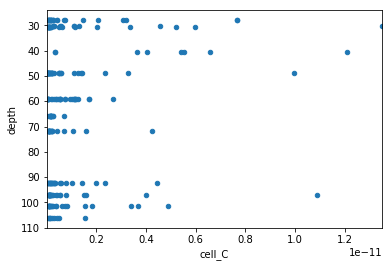

In [7]:
ax = df.plot.scatter(x = 'cell_C', y ='depth',\
                    xlim=(df['cell_C'].min()[0],df['cell_C'].max()[0]))
ax.invert_yaxis()